In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [3]:
data = np.genfromtxt("../로그 데이터/SEG_SGEMM_result.txt", delimiter="\n", dtype=np.int64)
data

array([ 3196231680, 93292771632, 93293300344, ..., 92658792872,
       92658792864, 92654987192], dtype=int64)

In [4]:
delta = np.array([data[i+1] - data[i] for i in range(int(len(data))-1)])
delta, len(delta)

(array([90096539952,      528712,       73032, ...,    36097352,
                 -8,    -3805672], dtype=int64),
 237194)

In [5]:
data_counts = pd.Series(data=delta.T).value_counts()
data_counts

 0             27460
 4096           7851
 909517620      1849
-909517620      1848
 8192           1481
               ...  
-3833072           1
 349797616         1
-5403768464        1
-568288            1
 7770728296        1
Length: 60247, dtype: int64

In [6]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

In [7]:
def tokenizer(data, category, oov=-1):
    data = data.copy()
    mask = np.isin(data, category)
    data[mask == False] = oov
    return data

In [50]:
threshold = 50
category_over_threshold = category_by_threshold(data_counts, threshold)
category_over_threshold

Int64Index([         0,       4096,  909517620, -909517620,       8192,
                    -8,      -4096,          8,      12288,       2416,
                 16384,         24,       3520,      -2744,        -12,
                -12288,      20480,         32,         64,          6,
                  4104,        -16,      24576,         28,       5280,
                 -2884,      28672,         56,      -8192,        240,
                  3904,       4092,      32768,       4128, -515913384,
                 40960,  515913384,       4080,       -240,     172032,
                 -8304,      90112,       3072,         16,      53248,
                    -4,         44,          2,        432,      81920,
                    48,     118784,       3936,     126976,       4112,
                     4,       3856,     -16384,      11776,      61440,
                  -432,        256,        -24,        -48,     -32768,
                131072,      69632,     135168,      94208,     

In [51]:
tokenized_data = tokenizer(delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_data

array([-1, -1, -1, ..., -1, -8, -1], dtype=int64)

In [52]:
tokenized_data_counts = pd.Series(data=tokenized_data.T).value_counts()
tokenized_data_counts

-1            183616
 0             27460
 4096           7851
 909517620      1849
-909517620      1848
               ...  
 376832           52
 184320           51
 36864            51
 77824            51
-61440            51
Length: 87, dtype: int64

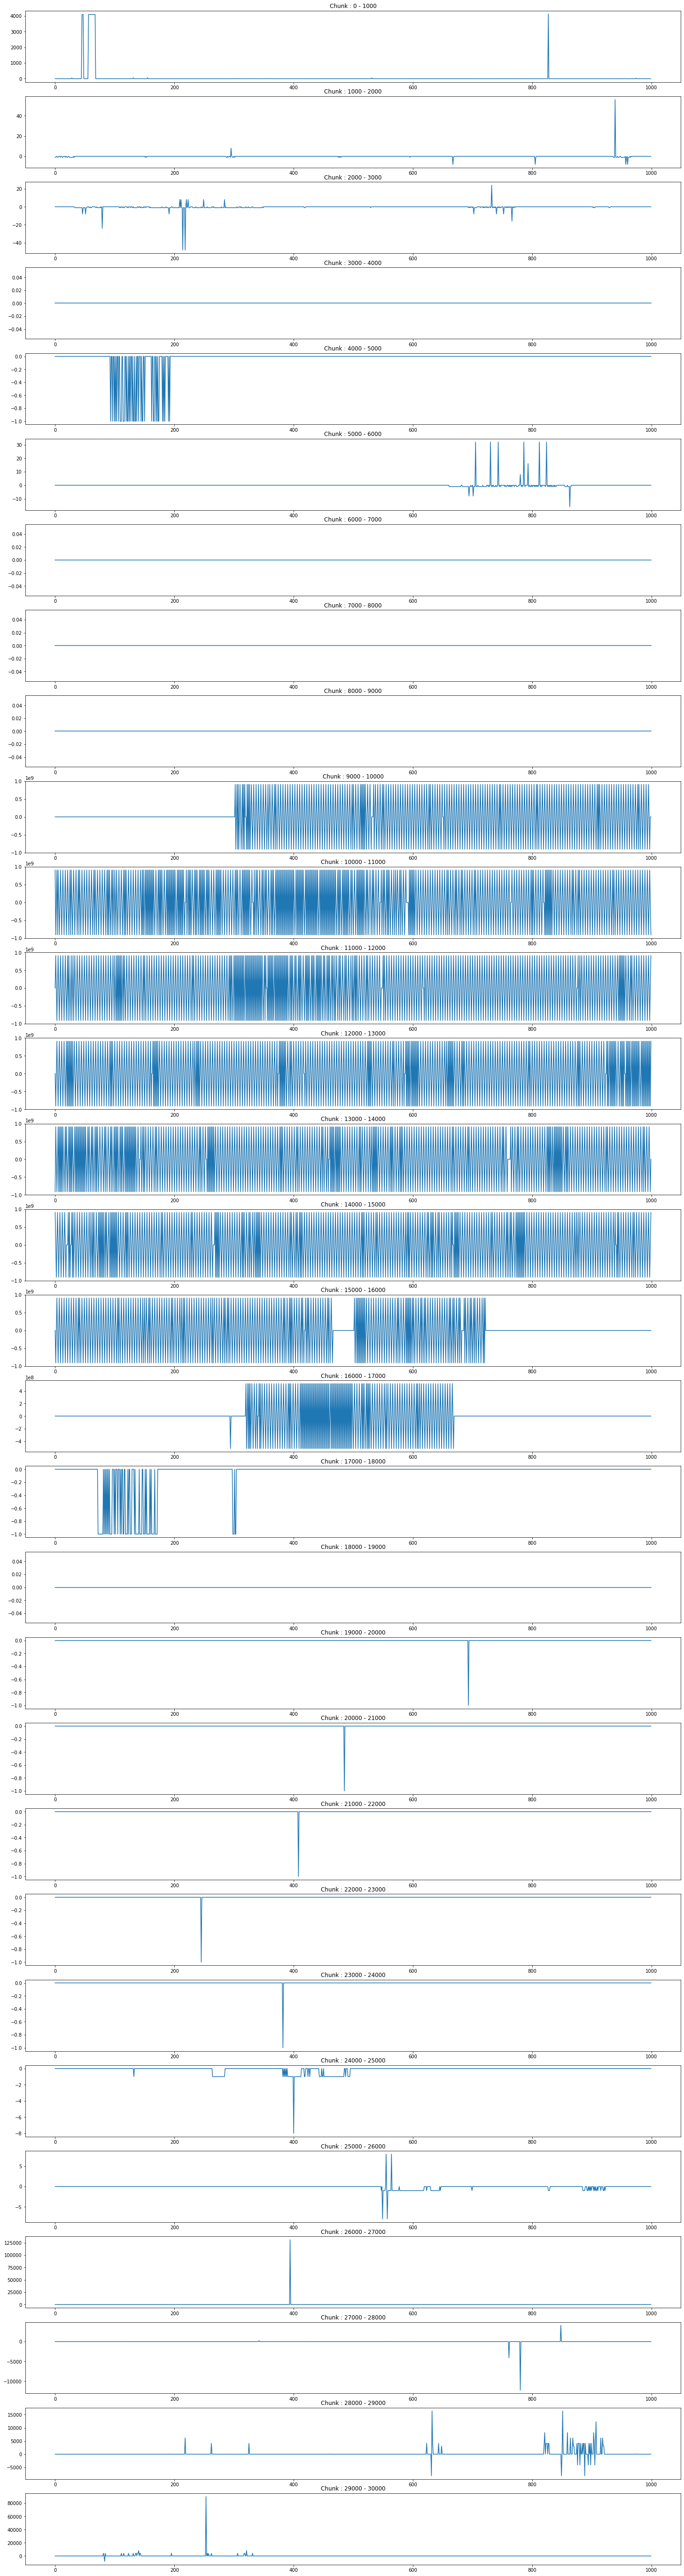

In [53]:
plt.figure(figsize=(25, 100))
num_chunk = 30
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

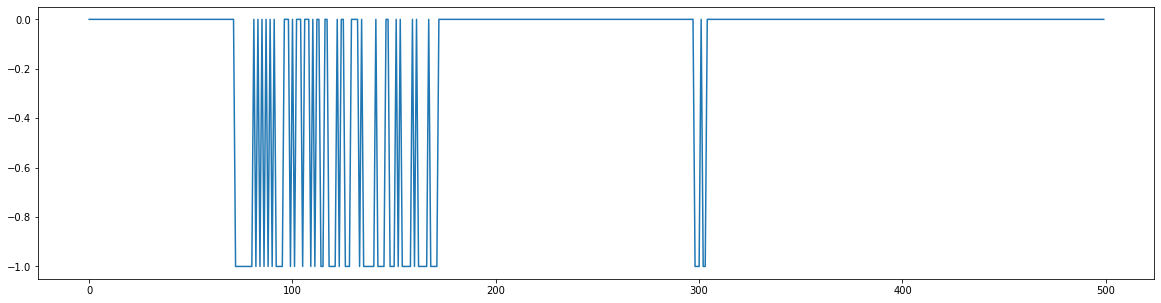

In [54]:
plt.plot(tokenized_data[17000:17500])

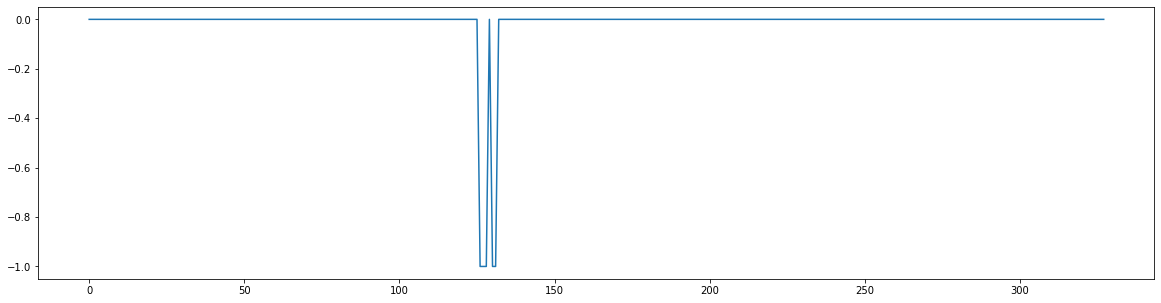

In [55]:
plt.plot(tokenized_data[17172:17500])

In [56]:
initial_stage_index = 17172

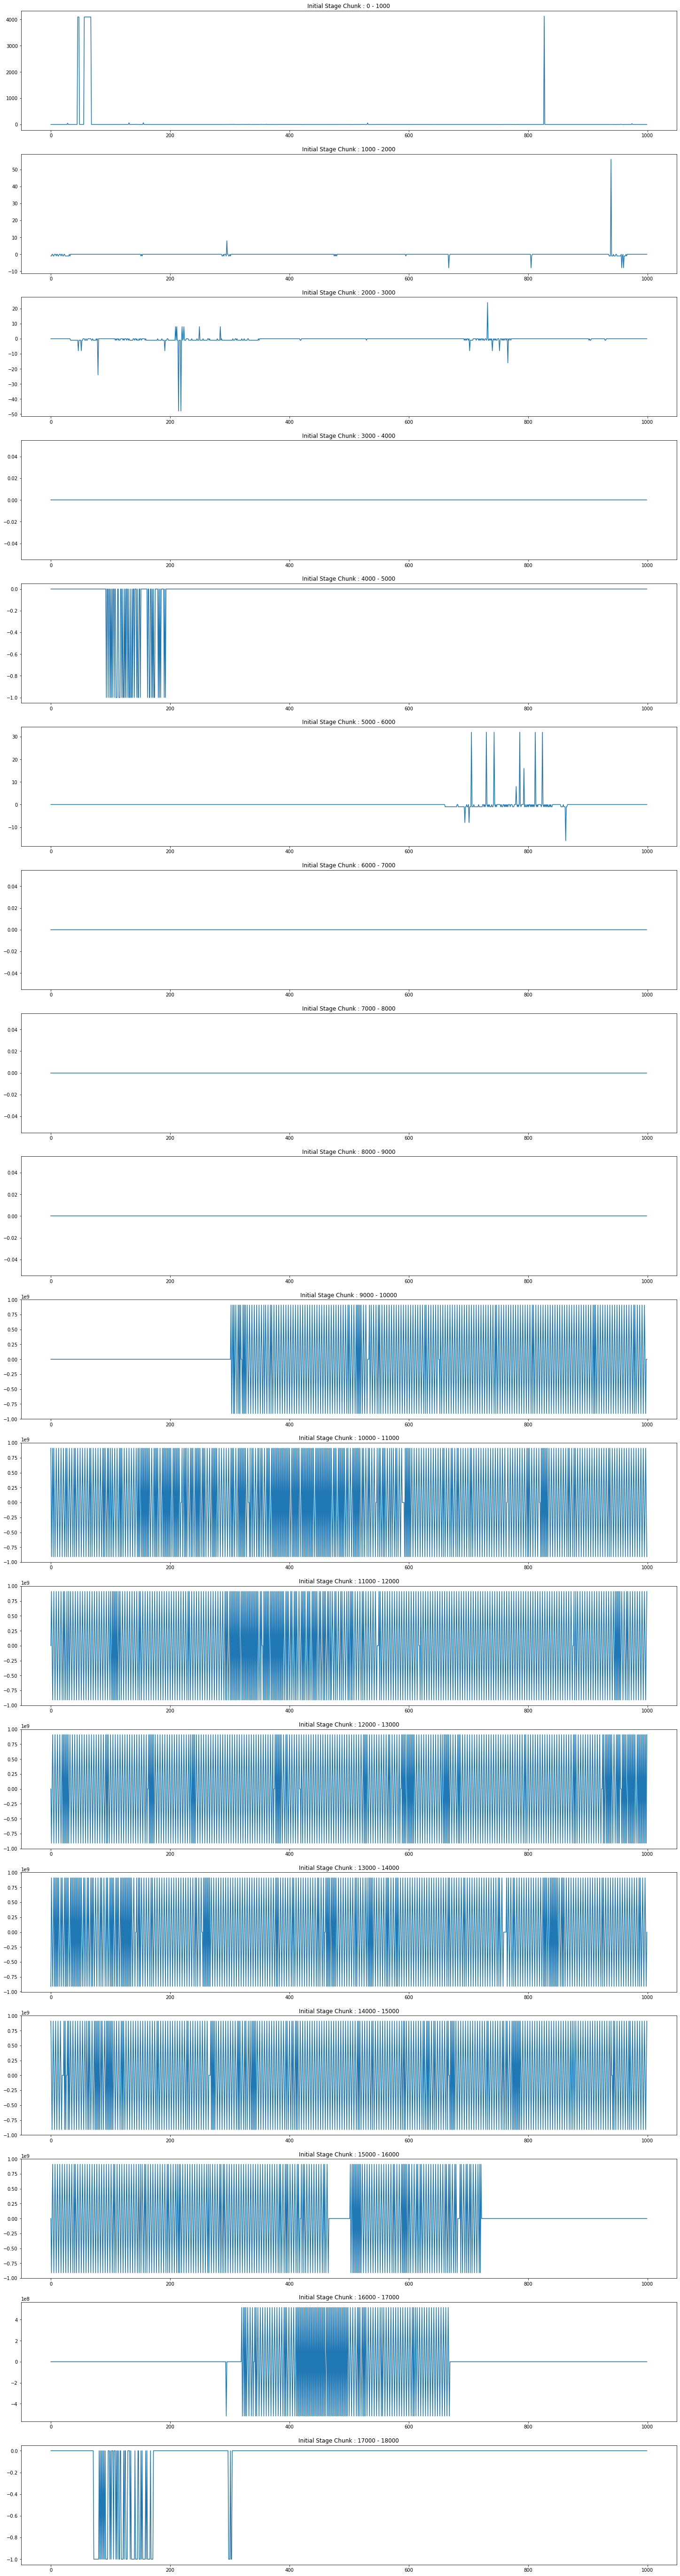

In [57]:
plt.figure(figsize=(25, 100))
num_chunk = initial_stage_index//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Initial Stage Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

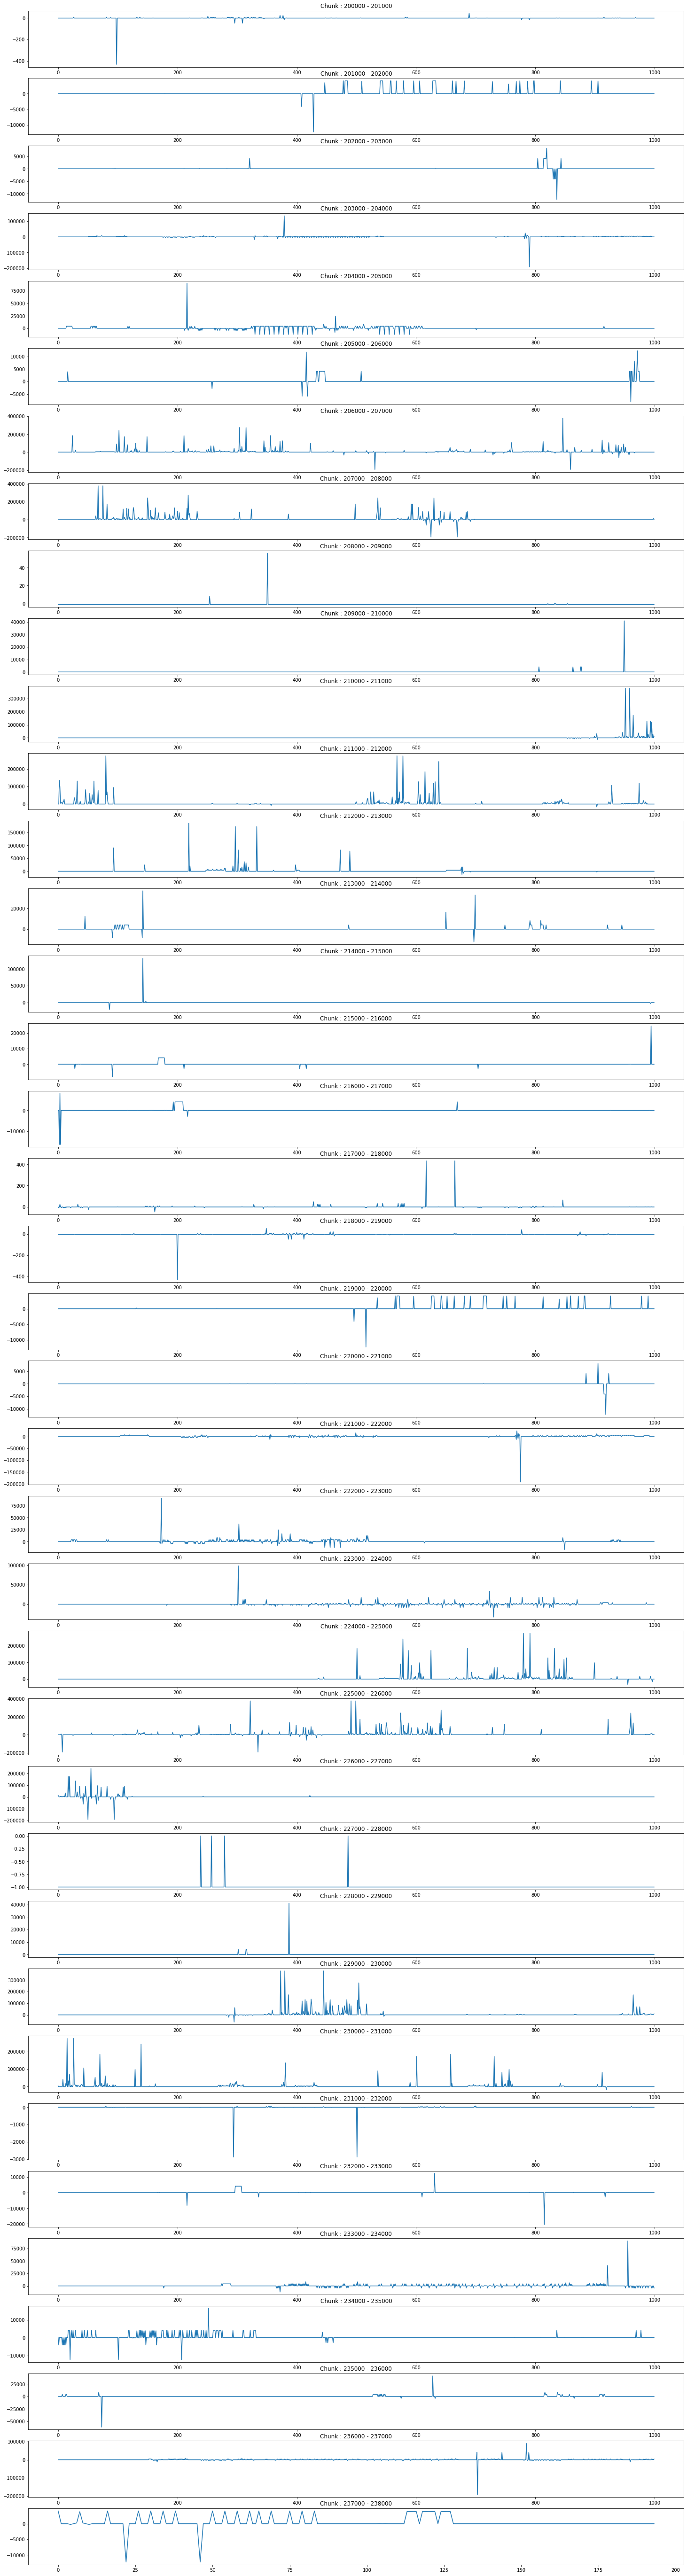

In [58]:
plt.figure(figsize=(25, 100))
num_chunk = 38
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(200000 + i*1000, 200000 + (i+1)*1000))
        plot = plt.plot(tokenized_data[200000 + i*1000:200000 + (i+1)*1000])

In [59]:
for i in range(len(tokenized_data)//1000 + 1):
    print("{} - {} : ".format(i*1000, 1000 + i*1000), (tokenized_data[i*1000:1000+i*1000] == -1).sum())

0 - 1000 :  417
1000 - 2000 :  54
2000 - 3000 :  250
3000 - 4000 :  0
4000 - 5000 :  40
5000 - 6000 :  109
6000 - 7000 :  0
7000 - 8000 :  0
8000 - 9000 :  0
9000 - 10000 :  0
10000 - 11000 :  0
11000 - 12000 :  0
12000 - 13000 :  0
13000 - 14000 :  0
14000 - 15000 :  0
15000 - 16000 :  0
16000 - 17000 :  16
17000 - 18000 :  68
18000 - 19000 :  0
19000 - 20000 :  1
20000 - 21000 :  1
21000 - 22000 :  1
22000 - 23000 :  1
23000 - 24000 :  1
24000 - 25000 :  97
25000 - 26000 :  104
26000 - 27000 :  676
27000 - 28000 :  508
28000 - 29000 :  898
29000 - 30000 :  490
30000 - 31000 :  954
31000 - 32000 :  957
32000 - 33000 :  922
33000 - 34000 :  937
34000 - 35000 :  941
35000 - 36000 :  918
36000 - 37000 :  924
37000 - 38000 :  907
38000 - 39000 :  716
39000 - 40000 :  878
40000 - 41000 :  996
41000 - 42000 :  995
42000 - 43000 :  993
43000 - 44000 :  942
44000 - 45000 :  844
45000 - 46000 :  868
46000 - 47000 :  920
47000 - 48000 :  864
48000 - 49000 :  954
49000 - 50000 :  906
50000 - 510

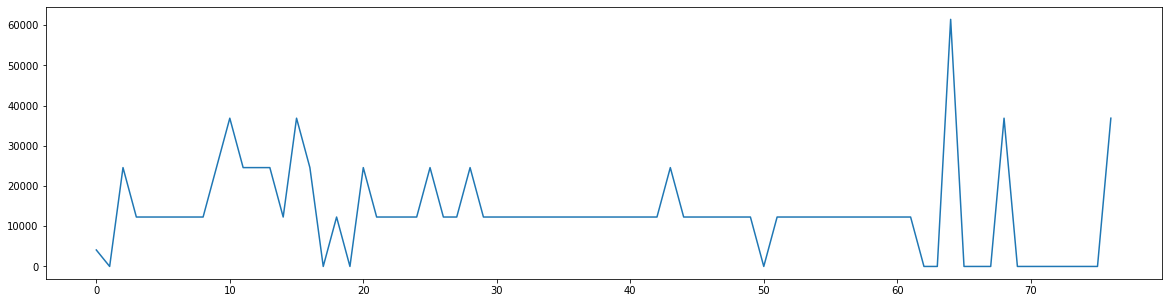

In [18]:
plt.plot(tokenized_data[48023:48100])

In [29]:
terminal_stage_index = 48023

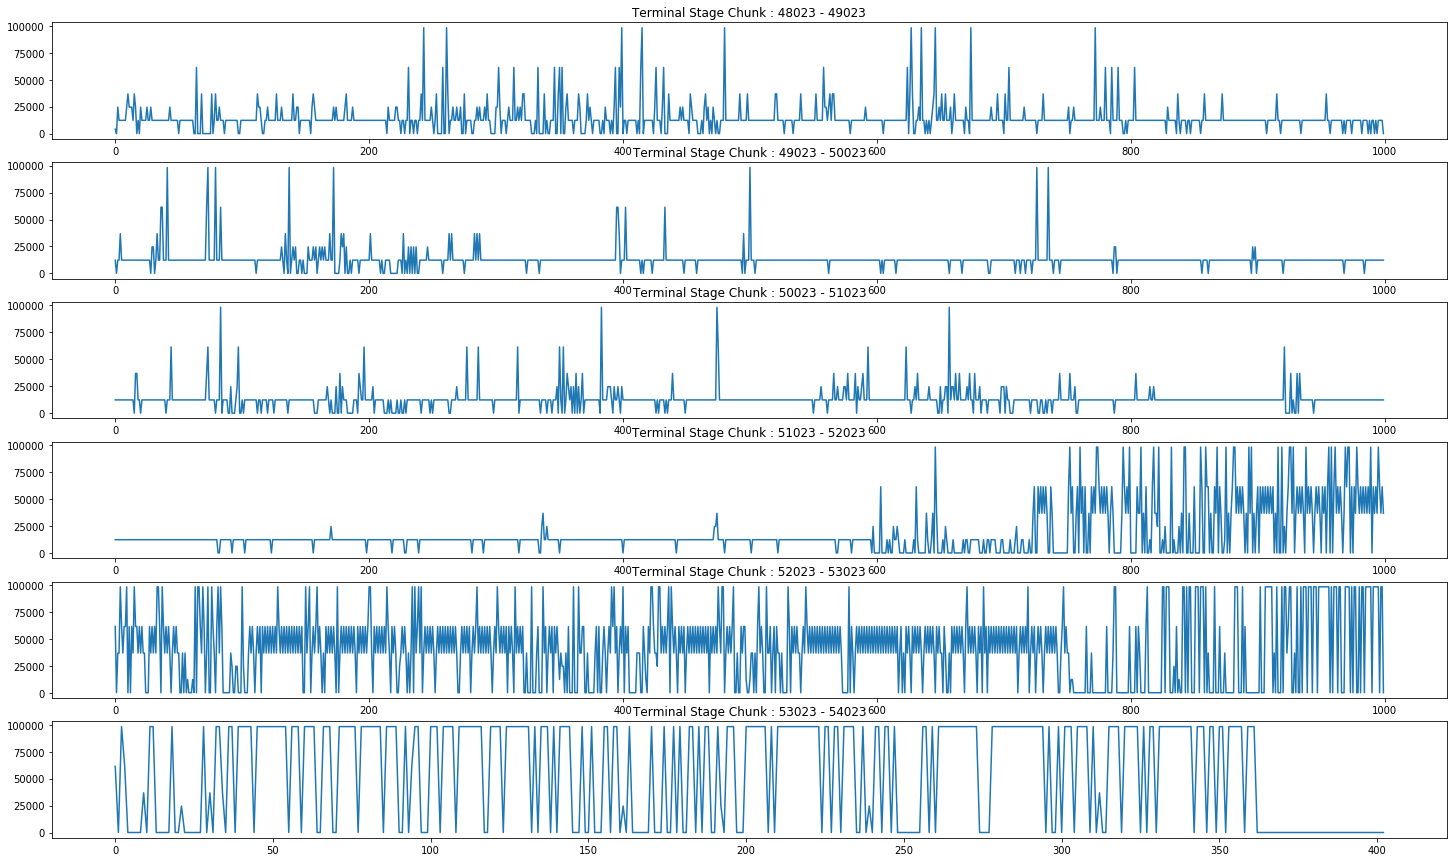

In [20]:
plt.figure(figsize=(25, 15))
num_chunk = (len(delta) - terminal_stage_index)//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Terminal Stage Chunk : {} - {}".format(terminal_stage_index + i*1000, terminal_stage_index + (i+1)*1000))
        plot = plt.plot(tokenized_data[terminal_stage_index + i*1000:terminal_stage_index + (i+1)*1000])

In [30]:
processed_dataset = pd.DataFrame(data=np.c_[data[initial_stage_index:terminal_stage_index], data[initial_stage_index+1:terminal_stage_index+1], delta[initial_stage_index:terminal_stage_index], tokenized_data[initial_stage_index:terminal_stage_index]], columns=["t", "t+1", "delta", "tokenized_data"])
processed_dataset

t           t+1  delta  tokenized_data
0      104291368960  104291373056   4096            4096
1      104291373056  104291377152   4096            4096
2      104291377152  104291381248   4096            4096
3      104291381248  104291385344   4096            4096
4      104291385344  104291389440   4096            4096
...             ...           ...    ...             ...
44873  103535153152  103535157248   4096            4096
44874  103535157248  103535161344   4096            4096
44875  103535161344  103535165440   4096            4096
44876  103535165440  103535169536   4096            4096
44877  103535169536  103535173632   4096            4096

[44878 rows x 4 columns]

In [31]:
for i in range(18000, 19000):
    print(processed_dataset["t+1"][i] - processed_dataset["t"][i], processed_dataset["delta"][i])

4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096


In [32]:
processed_dataset["tokenized_data"].value_counts()

 4096       44205
 0            354
-6291456      139
 2097152      137
-1             43
Name: tokenized_data, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(processed_dataset, test_size=0.25, shuffle=False)
train_set, test_set

(                  t           t+1    delta  tokenized_data
 0      104291368960  104291373056     4096            4096
 1      104291373056  104291377152     4096            4096
 2      104291377152  104291381248     4096            4096
 3      104291381248  104291385344     4096            4096
 4      104291385344  104291389440     4096            4096
 ...             ...           ...      ...             ...
 33653  103658029056  103658029056        0               0
 33654  103658029056  103660126208  2097152         2097152
 33655  103660126208  103660126208        0               0
 33656  103660126208  103653834752 -6291456        -6291456
 33657  103653834752  103653834752        0               0
 
 [33658 rows x 4 columns],
                   t           t+1    delta  tokenized_data
 33658  103653834752  103655931904  2097152         2097152
 33659  103655931904  103655931904        0               0
 33660  103655931904  103649640448 -6291456        -6291456
 33661  103

train_set.to_csv("data/StreamBench_1G1P_train_set.csv", index=False)
test_set.to_csv("data/StreamBench_1G1P_test_set.csv", index=False)